In [7]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

In [8]:
train_root = r'D:\基础项目实践\codetest-机器学习\ex2\mnist_images\train'
test_root = r'D:\基础项目实践\codetest-机器学习\ex2\mnist_images\test'

if not os.path.exists(train_root):
    raise FileNotFoundError(f"The specified path '{train_root}' does not exist.")

if not os.path.exists(test_root):
    raise FileNotFoundError(f"The specified path '{test_root}' does not exist.")

In [9]:
# 构建神经网络
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # 线性层1，输入层和隐藏层之间的线性层
        self.layer1 = nn.Linear(784, 256)
        # 线性层2，隐藏层和隐藏层之间的线性层
        self.layer2 = nn.Linear(256, 128)
        # 线性层3，隐藏层和输出层之间的线性层
        self.layer3 = nn.Linear(128, 10)

    # 在前向传播，forward函数中，输入为图像x
    def forward(self, x):
        x = x.view(-1, 28 * 28) # 使用view函数，将x展平
        x = self.layer1(x)  # 将x输入至layer1//第一个全连接层
        x = torch.relu(x)  # 使用relu激活
        x = self.layer2(x) # 输入至layer2计算结果//第二个全连接层
        x = torch.relu(x)  #使用relu激活
        return self.layer3(x)

In [10]:
# 遍历模型中的各个结构，计算可以训练的参数
def print_parameters(model):
    cnt = 0
    for name, layer in model.named_children(): # 遍历每一层
        # 打印层的名称和该层中包含的可训练参数
        print(f"layer({name}) parameters:")
        for p in layer.parameters():
            print(f'\t {p.shape} has {p.numel()} parameters')
            cnt += p.numel() # 将参数数量累加至cnt
    # 最后打印模型总参数数量
    print('The model has %d trainable parameters\n' % (cnt))

In [11]:
# 打印x经过每一层时的维度变化情况
def print_forward(model, x):
    print(f"x: {x.shape}") # x从一个5*28*28的输入张量
    x = x.view(-1, 28 * 28) # 经过view函数，变成了一个5*784的张量（将数据展平了）
    print(f"after view: {x.shape}")
    x = model.layer1(x) # 经过第1个线性层，得到5*256的张量
    print(f"after layer1: {x.shape}")
    x = torch.relu(x) # 经过第一次relu函数，（输出形状）没有变化
    print(f"after firstrelu: {x.shape}")
    x = model.layer2(x) # 经过第2个线性层，得到一个5*128的结果
    print(f"after layer2: {x.shape}")
    x = torch.relu(x) # 经过第二次relu函数，（输出形状）没有变化
    print(f"after secondrelu: {x.shape}")
    x = model.layer3(x) # 经过第3个线性层，得到5*10的张量
    print(f"after layer3: {x.shape}")

In [12]:
# 训练函数
def train_model(model, train_loader, criterion, optimizer, epochs):##trainloader，每次迭代返回一个批次的数据和对应的标签
    ##criterion(损失函数类型)，optimizer（优化器）
    losses = []
    accuracies = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (data, labels) in enumerate(train_loader):
            optimizer.zero_grad()##清除之前的数据
            outputs = model(data)##将训练集数据传入模型当中
            loss = criterion(outputs, labels)##计算损失函数
            loss.backward()
            #计算损失函数相对于模型参数的梯度，并将这些梯度存储在每个参数的grad属性当中
            optimizer.step()

            running_loss += loss.item()##累加损失值，后续计算本轮平均损失
            _, predicted = outputs.max(1)
            #—_,用来忽略第一个返回值
            # output通常为：[batch_size, num_classes]
            # max（1）：沿着第一维（类别维度）（维度的编码是从0开始的），会返回两个张量，最大值和最大值的索引
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            #predicted.eq(labels)， 比较 predicted 和 labels，返回一个布尔张量，表示每个样本的预测是否正确
            #.sum()： 计算布尔张量中 True 的数量，即预测正确的样本数量//返回值仍然是张量
            #.item():将结果转换为一个 Python 标量
            if batch_idx % 100 == 0: #每一百个数据打印一次结果
                print(f"Epoch {epoch + 1}/{epochs} | Batch {batch_idx}/{len(train_loader)} | Loss: {loss.item():.4f}")

        epoch_loss = running_loss / len(train_loader)#取平均值
        epoch_acc = correct / total
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}")

    return losses, accuracies

In [13]:
# 测试函数
def test_model(model, test_loader):
    model.eval()##是pytorch
    correct = 0
    total = 0

    with torch.no_grad():#关闭梯度计算
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

步骤：
1.对输入图像进行预处理、构造数据集
2.设置epoch=10，训练模型
3.对模型进行测试并输出loss和accuracy
4.对结果进行可视化处理

train_dataset length:  60000
train_loader length:  938
test_dataset length:  10000
Epoch 1/10 | Batch 0/938 | Loss: 2.3136
Epoch 1/10 | Batch 100/938 | Loss: 0.2950
Epoch 1/10 | Batch 200/938 | Loss: 0.6619
Epoch 1/10 | Batch 300/938 | Loss: 0.2704
Epoch 1/10 | Batch 400/938 | Loss: 0.1529
Epoch 1/10 | Batch 500/938 | Loss: 0.2564
Epoch 1/10 | Batch 600/938 | Loss: 0.2721
Epoch 1/10 | Batch 700/938 | Loss: 0.2277
Epoch 1/10 | Batch 800/938 | Loss: 0.1636
Epoch 1/10 | Batch 900/938 | Loss: 0.0779
Epoch 1/10 | Loss: 0.2784 | Accuracy: 0.9206
Epoch 2/10 | Batch 0/938 | Loss: 0.0692
Epoch 2/10 | Batch 100/938 | Loss: 0.0566
Epoch 2/10 | Batch 200/938 | Loss: 0.2083
Epoch 2/10 | Batch 300/938 | Loss: 0.1628
Epoch 2/10 | Batch 400/938 | Loss: 0.0159
Epoch 2/10 | Batch 500/938 | Loss: 0.1223
Epoch 2/10 | Batch 600/938 | Loss: 0.1163
Epoch 2/10 | Batch 700/938 | Loss: 0.0686
Epoch 2/10 | Batch 800/938 | Loss: 0.0336
Epoch 2/10 | Batch 900/938 | Loss: 0.1397
Epoch 2/10 | Loss: 0.1081 | Accuracy

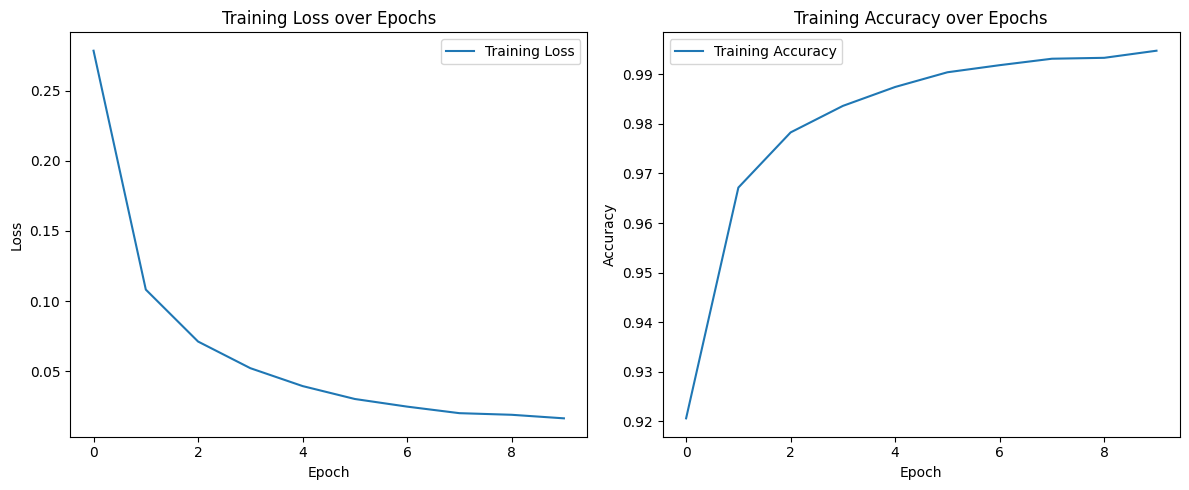

In [14]:
if __name__ == '__main__':
    # 图像的预处理
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # 转换为单通道灰度图
        transforms.ToTensor()  # 转换为张量
    ])

    # 读入并构造数据集
    train_dataset = datasets.ImageFolder(root=train_root, transform=transform)
    print("train_dataset length: ", len(train_dataset))

    # 小批量的数据读入
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    print("train_loader length: ", len(train_loader))

    # 读取测试数据集
    test_dataset = datasets.ImageFolder(root=test_root, transform=transform)
    print("test_dataset length: ", len(test_dataset))
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    model = Network()  # 模型本身，它就是我们设计的神经网络
    optimizer = optim.Adam(model.parameters())  # 优化模型中的参数
    criterion = nn.CrossEntropyLoss()  # 分类问题，使用交叉熵损失误差

    # 进入模型的迭代循环
    epochs = 10
    losses, accuracies = train_model(model, train_loader, criterion, optimizer, epochs)

    # 保存模型
    torch.save(model.state_dict(), 'mnist.pth')

    # 测试模型
    test_accuracy = test_model(model, test_loader)

    # 绘制训练过程中的损失和准确率
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()